In [41]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import os

In [52]:
flights_df = pd.read_csv('C:/New folder/a Tech/NTI/BIG DATA/Python/7-Day-05-13/flights.csv')
weather_df = pd.read_csv('C:/New folder/a Tech/NTI/BIG DATA/Python/7-Day-05-13/weather.csv')

In [19]:
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)



(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [20]:
flights_df.dest.unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

In [21]:
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


In [23]:
dest_seattle = flights_df['dest']=='SEA'
len(flights_df[dest_seattle])

3923

In [24]:
flights_seattle_df= flights_df[dest_seattle]
len(flights_seattle_df['carrier'].unique())

5

In [26]:
flights_seattle_df['tailnum'].nunique()

935

In [27]:
flights_seattle_df['arr_delay'].mean()

-1.0990990990990992

In [29]:
print(flights_seattle_df.groupby('origin').size()/flights_seattle_df['flight'].count())

origin
EWR    0.466735
JFK    0.533265
dtype: float64


In [30]:
flights_grp_dd_df = flights_df.groupby(['month','day'],as_index = False).agg({'dep_delay':'mean'})
max_dep_delay = flights_grp_dd_df['dep_delay'].max()
print(flights_grp_dd_df[flights_grp_dd_df['dep_delay']== max_dep_delay])

    month  day  dep_delay
66      3    8  83.536921


In [32]:
flights_grp_ad_df = flights_df.groupby(['month','day'],as_index = False).agg({'arr_delay':'mean'})
max_arr_delay = flights_grp_ad_df['arr_delay'].max()
print(flights_grp_ad_df[flights_grp_ad_df['arr_delay']== max_arr_delay])

    month  day  arr_delay
66      3    8  85.862155


In [37]:
# Worst day is the day with the maximum number of delayed flights (flights with positive departure delay)
flights_grp_dd_df = flights_df[flights_df['dep_delay'] > 0].groupby(['month', 'day'], as_index=False).agg({'flight': 'count'})
max_delayed_flights = flights_grp_dd_df['flight'].max()
print(flights_grp_dd_df[flights_grp_dd_df['flight'] == max_delayed_flights])


     month  day  flight
356     12   23     674


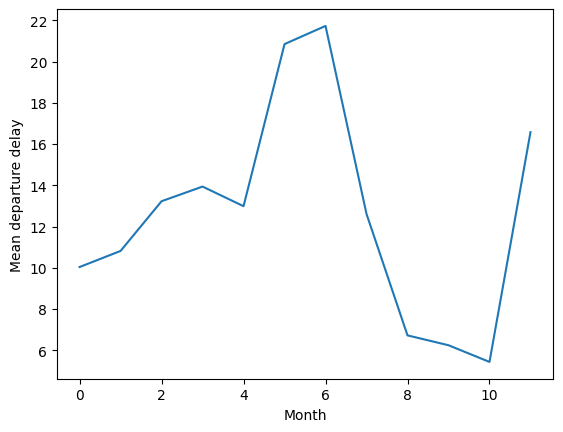

In [42]:
delay_mon_grp = flights_df.groupby(['month'], as_index = False).agg({'dep_delay':'mean'})
delay_mon_grp['dep_delay'].plot()
plt.xlabel('Month')
plt.ylabel('Mean departure delay')
plt.show()

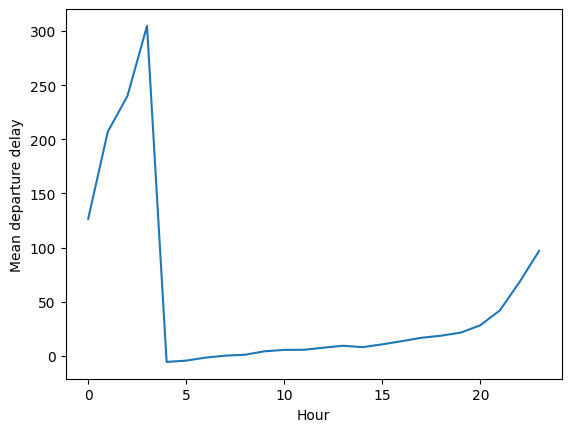

In [44]:
flights_df.loc[flights_df.hour == 24, 'hour'] = 0
delay_grp = flights_df.groupby(['hour'], as_index=False).agg({'dep_delay': 'mean'})
delay_grp['dep_delay'].plot()
plt.xlabel('Hour')
plt.ylabel('Mean departure delay')
plt.show()


In [45]:
flights_df['speed'] = flights_df.distance/(flights_df.air_time/60)
max_speed = max(flights_df['speed'])
flights_df[flights_df['speed']== max_speed]

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,unique_day,speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,28,703.384615


In [46]:
#To find the carrier+flight+dest combination which flies every day of the year. Also find the destination of the flight.
flights_df['unique_day'] = pd.factorize(flights_df.month+flights_df.day)[0]
flights_count_df = flights_df.groupby(['flight','carrier','dest'],as_index = False).agg({'unique_day':'count'})
print(len(flights_count_df[flights_count_df['unique_day']>=365]))
print(flights_count_df[flights_count_df['unique_day']>=365].dest.unique())

18
['HNL' 'SFO' 'LAX' 'CLT' 'LAS' 'BUR' 'FLL' 'SRQ' 'SJU' 'MIA' 'MCO' 'TPA'
 'IAD']


  carrier  dep_delay
0      AA  10.041551
1      AS   5.804775
2      B6  11.592593
3      DL   7.391376
4      UA  17.315647


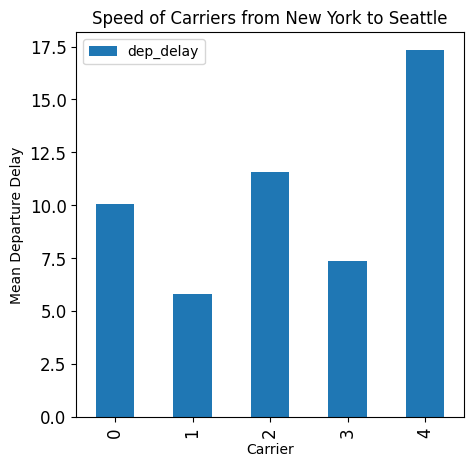

In [49]:


flights_speed_dep_df = flights_seattle_df.groupby(['carrier'],as_index = False).agg({'dep_delay':'mean'})

print(flights_speed_dep_df)

flights_speed_dep_df.plot(kind='bar', title ="Speed of Carriers from New York to Seattle",figsize=(5,5),legend=True, fontsize=12)

plt.xlabel('Carrier')

plt.ylabel('Mean Departure Delay')

plt.show()

plt.close()




  carrier  arr_delay
0      AA  -1.475000
1      AS  -9.930889
2      B6   7.721248
3      DL  -5.886023
4      UA   5.827430


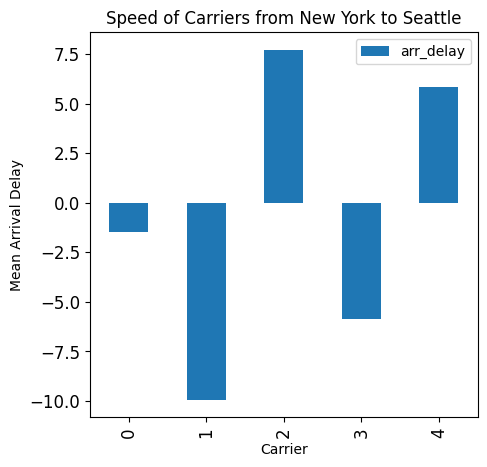

In [50]:
flights_speed_arr_df = flights_seattle_df.groupby(['carrier'],as_index = False).agg({'arr_delay':'mean'})
print(flights_speed_arr_df)
flights_speed_arr_df.plot(kind='bar', title ="Speed of Carriers from New York to Seattle",figsize=(5,5),legend=True, fontsize=12)
plt.xlabel('Carrier')
plt.ylabel('Mean Arrival Delay')
plt.show()
plt.close()

In [54]:

weather_df

combined_df = pd.merge(flights_df,weather_df, how = 'left', on = ['origin','year','month','day','hour'])

print(combined_df.head())

combined_df = combined_df[['month','day','dep_delay','temp','humid','visib','dewp','wind_dir','wind_speed','wind_gust','precip','pressure']]

wea_temp_day_df = combined_df.groupby(['month','day'],as_index = False).agg({'dep_delay':'mean','temp':'mean','humid':'mean','visib':'mean','dewp':'mean','wind_dir':'mean','wind_speed':'mean','wind_gust':'mean','precip':'mean','pressure':'mean'})

print(wea_temp_day_df.columns)







   Unnamed: 0_x  year  month  day  dep_time  dep_delay  arr_time  arr_delay   
0             1  2013      1    1     517.0        2.0     830.0       11.0  \
1             2  2013      1    1     533.0        4.0     850.0       20.0   
2             3  2013      1    1     542.0        2.0     923.0       33.0   
3             4  2013      1    1     544.0       -1.0    1004.0      -18.0   
4             5  2013      1    1     554.0       -6.0     812.0      -25.0   

  carrier tailnum  ...  Unnamed: 0_y temp dewp  humid  wind_dir  wind_speed   
0      UA  N14228  ...           NaN  NaN  NaN    NaN       NaN         NaN  \
1      UA  N24211  ...           NaN  NaN  NaN    NaN       NaN         NaN   
2      AA  N619AA  ...           NaN  NaN  NaN    NaN       NaN         NaN   
3      B6  N804JB  ...           NaN  NaN  NaN    NaN       NaN         NaN   
4      DL  N668DN  ...           NaN  NaN  NaN    NaN       NaN         NaN   

   wind_gust  precip  pressure  visib  
0        N

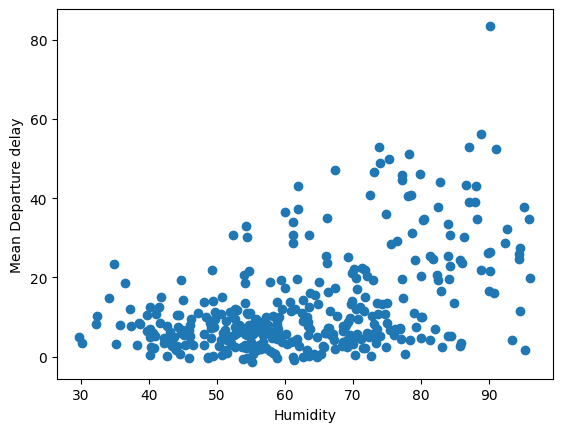

In [55]:
plt.scatter(wea_temp_day_df['humid'], wea_temp_day_df['dep_delay'])
plt.xlabel('Humidity')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()

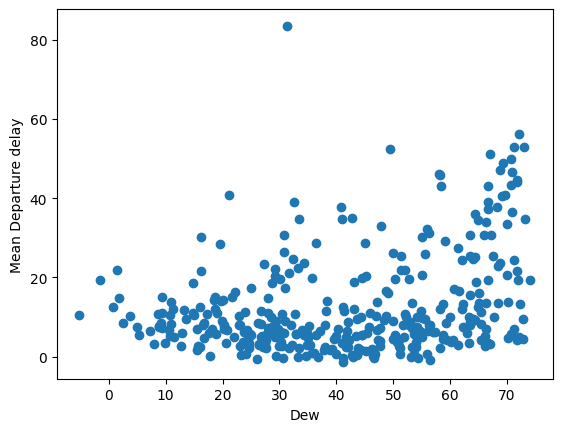

In [56]:
plt.scatter(wea_temp_day_df['dewp'], wea_temp_day_df['dep_delay'])
plt.xlabel('Dew')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()

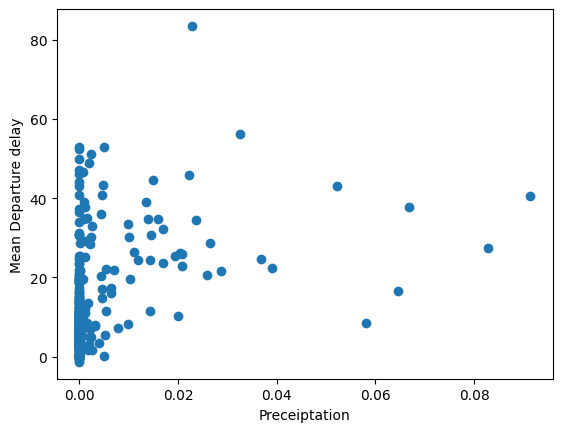

In [57]:
plt.scatter(wea_temp_day_df['precip'], wea_temp_day_df['dep_delay'])
plt.xlabel('Preceiptation')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()

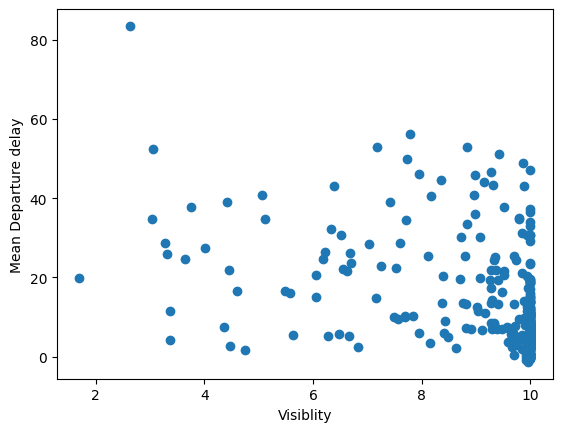

In [58]:
plt.scatter(wea_temp_day_df['visib'], wea_temp_day_df['dep_delay'])
plt.xlabel('Visiblity')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()

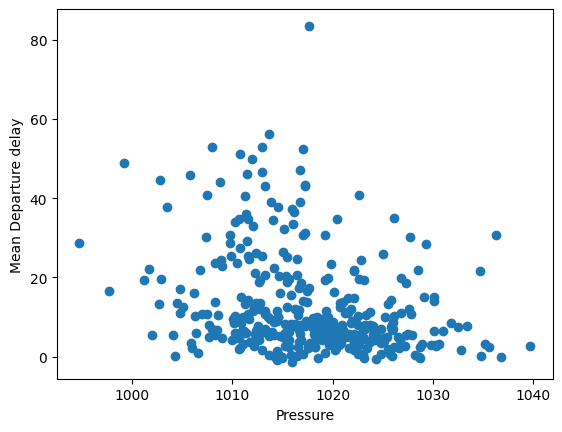

In [59]:
plt.scatter(wea_temp_day_df['pressure'], wea_temp_day_df['dep_delay'])
plt.xlabel('Pressure')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()